<a href="https://colab.research.google.com/github/the-aryan-1712/DeepFlow-Stamatics/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q gdown

In [ ]:
file_id = "1O5NHi1cPmh6Zl4FqEalXCi1ACocH8WZk"
!gdown --id {file_id} --output dataset.zip

import zipfile
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

import os
os.listdir("dataset")

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O5NHi1cPmh6Zl4FqEalXCi1ACocH8WZk
From (redirected): https://drive.google.com/uc?id=1O5NHi1cPmh6Zl4FqEalXCi1ACocH8WZk&confirm=t&uuid=b7462b32-e415-4c0f-9777-bcd21d0baa45
To: /content/dataset.zip
100% 72.0M/72.0M [00:01<00:00, 66.3MB/s]


['bluebook-for-bulldozers']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

### READING DATASET

In [ ]:
df = pd.read_csv('/content/dataset/bluebook-for-bulldozers/Train.csv', low_memory=False)

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

,0
Pushblock,375906
Tip_Control,375906
Enclosure_Type,375906
Engine_Horsepower,375906
Blade_Extension,375906
Blade_Width,375906
Scarifier,375895
Grouser_Tracks,357763
Hydraulics_Flow,357763
Coupler_System,357667


### Dropping Columns with More Null Values

### Handling missing value

In [ ]:
threshold = 0.85
to_drop = df.columns[df.isnull().mean() > threshold]
df.drop(columns=to_drop, inplace=True)

In [ ]:
for col in ['Enclosure', 'ProductSize', 'Transmission', 'Forks']:
    df[col] = df[col].fillna('Unknown')

In [ ]:
df['MachineHoursCurrentMeter'] = df['MachineHoursCurrentMeter'].fillna(df['MachineHoursCurrentMeter'].median())
df['auctioneerID'] = df['auctioneerID'].fillna(df['auctioneerID'].mode()[0])

### Feature Engineering

In [ ]:
df['saledate'] = pd.to_datetime(df['saledate'])
df['saleYear'] = df['saledate'].dt.year
df['saleMonth'] = df['saledate'].dt.month
df['MachineAge'] = df['saleYear'] - df['YearMade']
df['MachineAge'] = df['MachineAge'].replace(df['MachineAge'].max(), 0)

In [ ]:
y = df['SalePrice']

In [ ]:
# X = df.drop(['SalePrice','SalesID', 'saledate'], axis=1, inplace=True)
# X = df.drop(['SalePrice'], axis=1, inplace=True)
# X = df.drop(['SalePrice'], axis=1)
X = df.drop(['SalePrice','SalesID', 'saledate'], axis=1)

In [ ]:
df.drop(columns=[ 'MachineID', 'ModelID', 'datasource'])

,SalesID,SalePrice,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,MachineAge
0,1139246,66000,3.0,2004,68.0,Low,2006-11-16,521D,521,D,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,2
1,1139248,57000,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,8
2,1139249,10000,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,3
3,1139251,38500,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,10
4,1139253,11000,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1.0,2005,0.0,NaN,2011-11-02,35NX2,35,NX,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,6
401121,6333337,11000,1.0,2005,0.0,NaN,2011-11-02,35NX2,35,NX,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,6
401122,6333338,11500,1.0,2005,0.0,NaN,2011-11-02,35NX2,35,NX,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,6
401123,6333341,9000,2.0,2005,0.0,NaN,2011-10-25,30NX,30,NX,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,10,6


In [ ]:
# Label encode all object columns
cat_cols = X.select_dtypes(include='object').columns

for col in cat_cols:
    X[col] = X[col].astype(str)
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Confirm all columns are numeric now
assert X.select_dtypes(include='object').empty, "There are still object columns in X"

<Axes: >

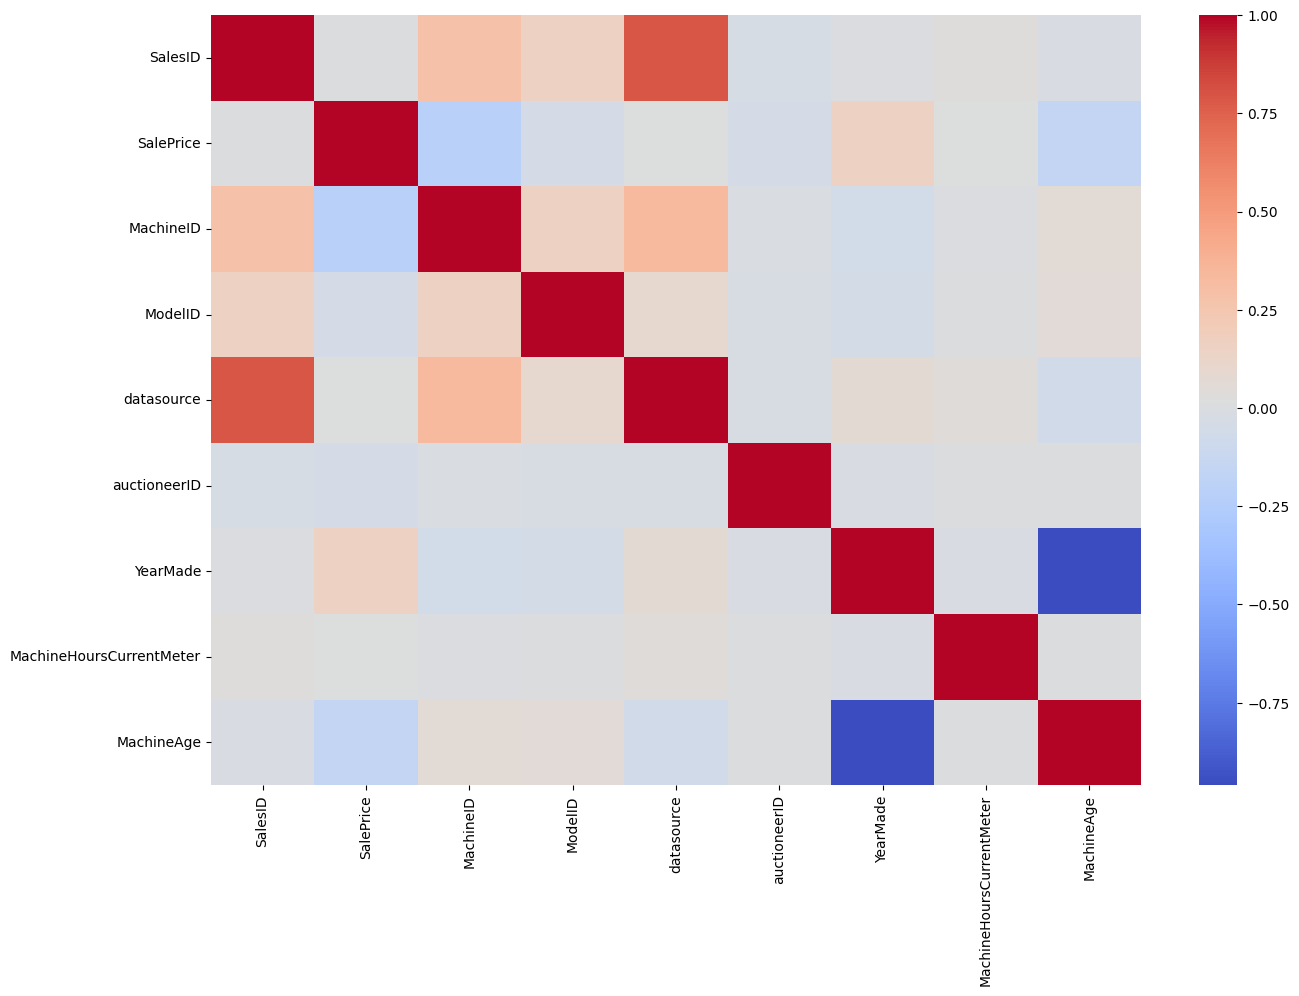

In [ ]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')

 ## Building an evaluation function


 Evaluation function is to check the accuracy , loss and score after training the model. This step will help in analysing the efficiency of the model

In [ ]:
# Create evaluation function (the competition use RMSLE)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_pred):
    '''
    Calculates root mean squared log error between prediction and
    true labels.

    '''
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create funtion to evaluate model on a few different levels
def show_scores(model):
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    score = {'Training MAE' : mean_absolute_error(y_train, train_pred),
             'Valid MAE' : mean_absolute_error(y_val, val_pred),
             'Training RMSLE' : rmsle(y_train, train_pred),
             'Valid RMSLE': rmsle(y_val, val_pred),
             'Training R^2': r2_score(y_train, train_pred),
             'Valid R^2' : r2_score(y_val, val_pred)}
    return score


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf =1,
                                    min_samples_split=12,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

In [ ]:
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=12, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [ ]:
score = show_scores(ideal_model)
score

{'Training MAE': 2995.089500574654,
 'Valid MAE': 4475.324420460483,
 'Training RMSLE': np.float64(0.14700043939991658),
 'Valid RMSLE': np.float64(0.21592982172485417),
 'Training R^2': 0.9582096785551182,
 'Valid R^2': 0.9036853214876317}

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [ ]:
def preprocess_data(df):
    '''
    Performs transformations on df and return transformed dataframe
    '''
    df['saleYear']= df.saledate.dt.year
    df['saleMonth']= df.saledate.dt.month
    df['saleDay']=  df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear

    df.drop('saledate',axis=1, inplace=True)

    #  Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Fill missing numeric values with the median
                df[label] = content.fillna(content.median())

        # Filled categorical values missing data and turned into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1


    return df

In [ ]:
df_test_path = '/content/dataset/bluebook-for-bulldozers/Test.csv'

In [ ]:
df_test = pd.read_csv(df_test_path,
                 low_memory=False,
                 parse_dates=['saledate'])

In [ ]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,0,0,0,0,0,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,0,0,0,3,2,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,0,0,0,0,0,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,0,0,0,0,0,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,1,4,5,0,0,2012,5,10,3,131


In [ ]:
# we can find how the columns differ using sets
missing_cols = set(X_train.columns) - set(df_test.columns)
missing_cols

{'MachineAge'}

In [ ]:
# Store SalesID separately
sales_ids = df_test['SalesID'].copy()

for col in missing_cols:
    df_test[col] = 0  # or a sensible default like the median

# Drop extra columns not seen during training
extra_cols = set(df_test.columns) - set(X_train.columns)
df_test = df_test.drop(columns=extra_cols)

# Reorder columns to match training data
df_test = df_test[X_train.columns]

Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [ ]:
# Make predictions on the test data
test_pred = ideal_model.predict(df_test)

In [ ]:
df_pred = pd.DataFrame()
df_pred['SalesID'] = sales_ids
df_pred['SalesPrice'] = test_pred
df_pred

,SalesID,SalesPrice
0,1227829,54669.923755
1,1227844,27626.049272
2,1227847,76769.022030
3,1227848,66683.494662
4,1227863,60344.076640
...,...,...
12452,6643171,73498.891256
12453,6643173,66142.771287
12454,6643184,40160.294016
12455,6643186,66787.713331


In [ ]:
# Export prediction data
df_pred.to_csv('Bull_test_prediction.csv', index=False)

## Features Importance

Feature importance aims to identify which attributes of the data had the greatest influence on predicting the target variable (SalePrice).

In [ ]:
# FInd feature importance of our best  model
len(ideal_model.feature_importances_)

42

In [ ]:
# Helper fuction for plotting feature importance
def plot_features(columns, importances, n=20):
    df= (pd.DataFrame({'features':columns,
                       'feature_importances': importances})
        .sort_values('feature_importances',ascending=False)
        .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:20])
    ax.invert_yaxis()

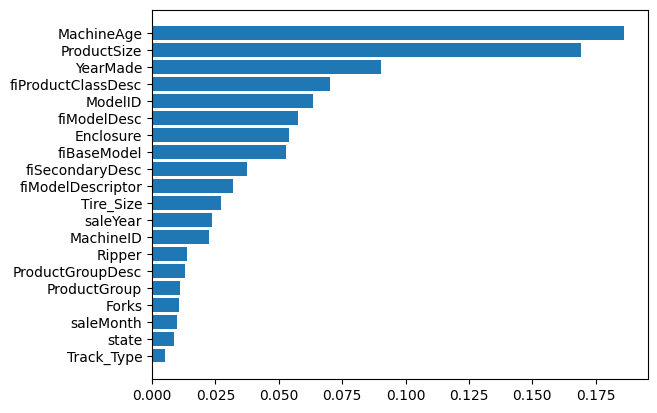

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)